In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 150

In [2]:
df = pd.read_csv("C:/Users/HP/Desktop/python/udemy_py/DATA/Ames_Housing_Data.csv")

In [3]:
df.head(2)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

## Correlation Analysis
- as we are interested in predcting sale price so we check correlation of all the features against sale price

<Axes: >

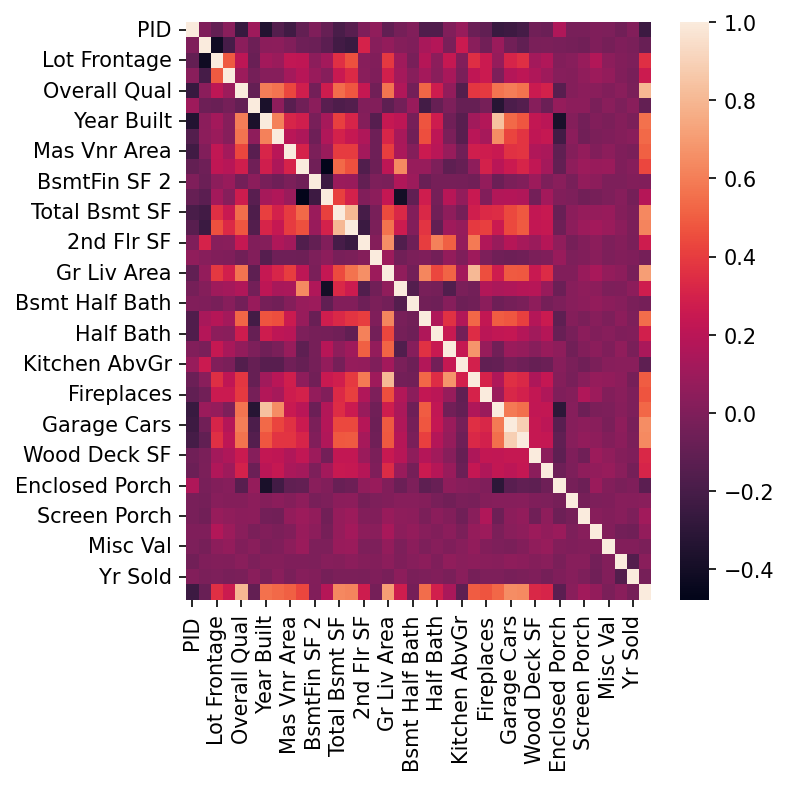

In [5]:
sns.heatmap(df.corr())

In [6]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

- **we can observe that overall quality & General living Area is highly correlated with sale price**

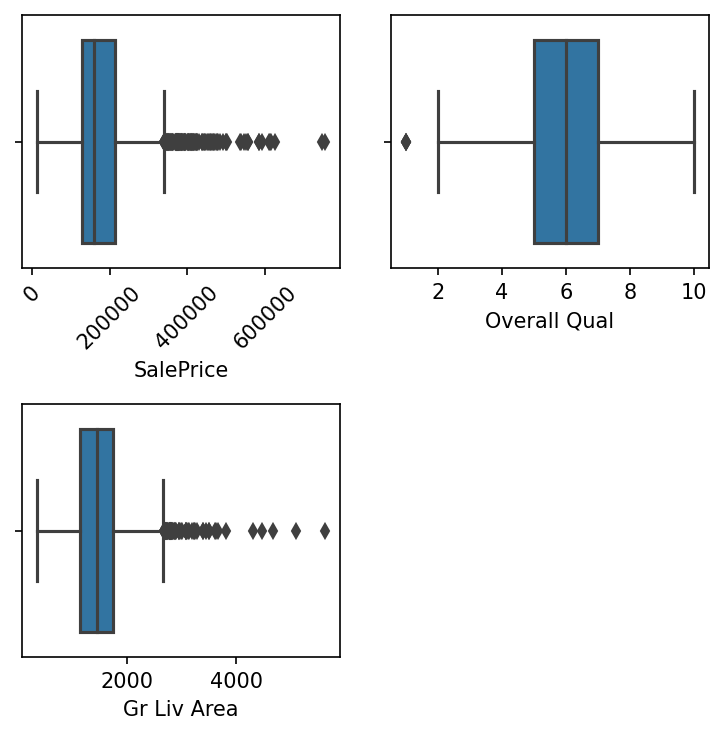

In [7]:
plt.subplot(2,2,1)
sns.boxplot(data = df, x = 'SalePrice')
plt.xticks(rotation = 45)
plt.subplot(2,2,2)
sns.boxplot(data = df, x= 'Overall Qual')
plt.subplot(2,2,3)
sns.boxplot(data = df, x= 'Gr Liv Area')
plt.tight_layout()

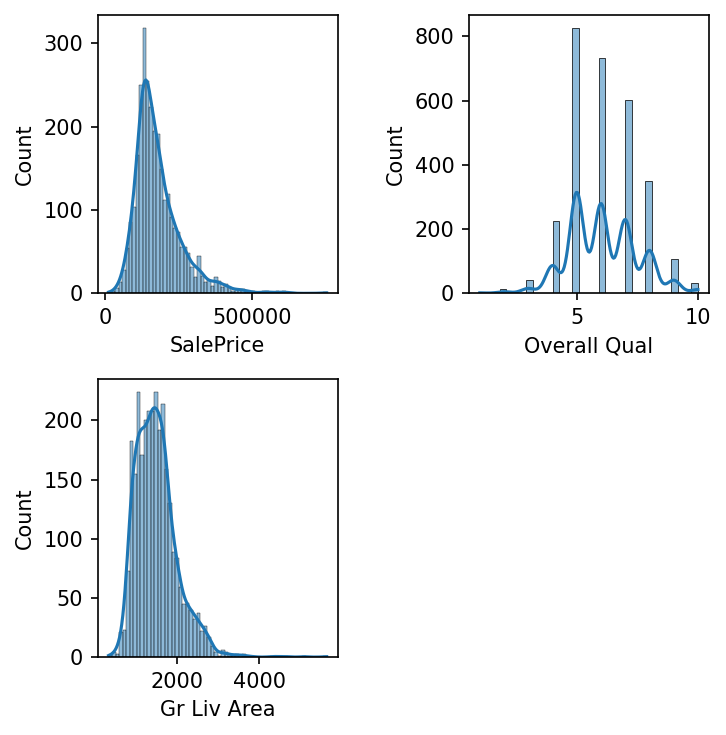

In [8]:
# checking distribution of sale price, general living area & overall quality quality
plt.subplot(2,2,1)
sns.histplot(data = df, x = 'SalePrice',kde = True)
plt.subplot(2,2,2)
sns.histplot(data = df, x= 'Overall Qual',kde = True)
plt.subplot(2,2,3)
sns.histplot(data = df, x= 'Gr Liv Area',kde = True)
plt.tight_layout()

## Outlier Handeling

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

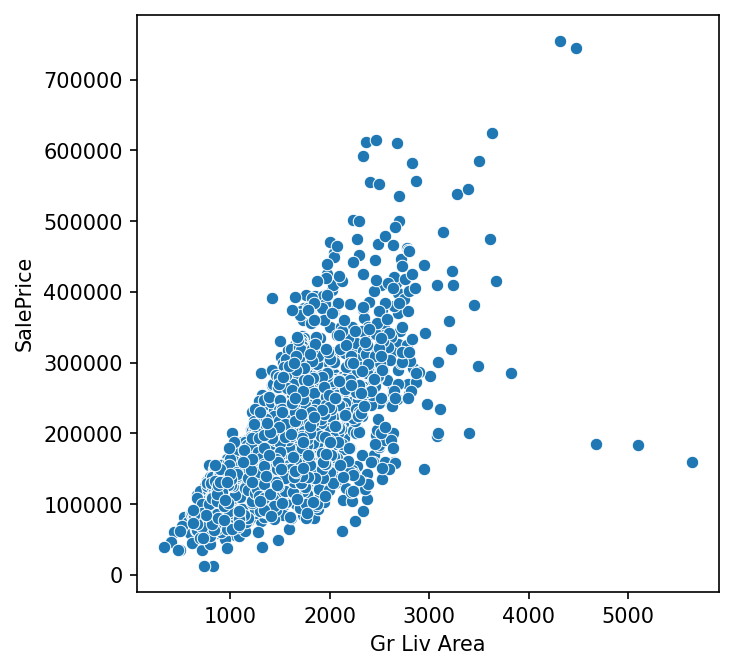

In [9]:
# here we check relation pattern & certain outliers between sale price & general living area
sns.scatterplot(data = df, x = 'Gr Liv Area', y = 'SalePrice')

- **here we can see an increasing trend, there is presence of positive correlation between sale price and general living area**
 - **there are few outliers where sale pirce is very less as compared to genernal living area & exceptional high sale price**

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

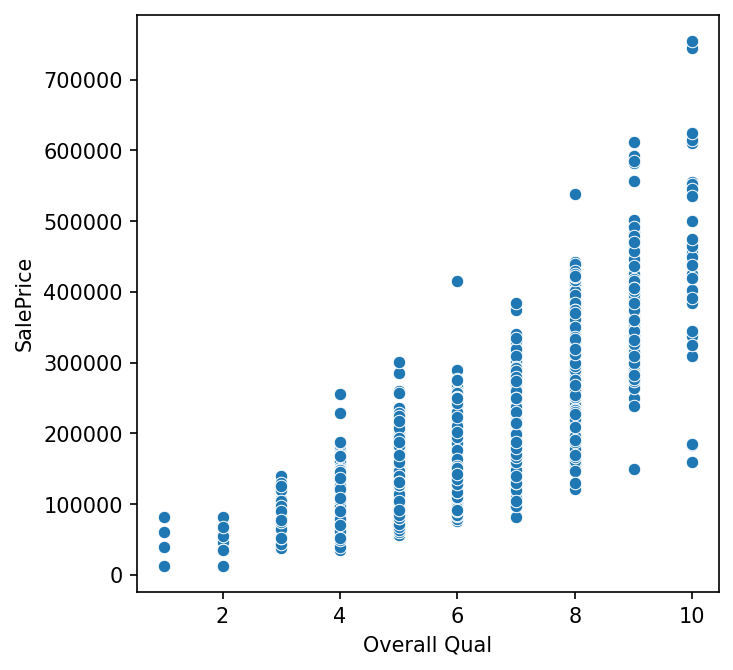

In [10]:
# here we check relation pattern & certain outliers between sale price & general living area
sns.scatterplot(data = df, x = 'Overall Qual', y = 'SalePrice')

In [11]:
# visualizing these outliers using filtering 
df[(df['SalePrice'] < 200000) & (df['Gr Liv Area'] > 4000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [12]:
df[(df['SalePrice'] > 700000) & (df['Gr Liv Area'] > 4000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1760,528320050,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1767,528351010,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [17]:
# dropping these outliers 
drop_ind = df[(df['SalePrice'] > 700000) & (df['Gr Liv Area'] > 4000)].index
df.drop(index=drop_ind,axis = 0,inplace=True)

In [18]:
drop_ind = df[(df['SalePrice'] < 200000) & (df['Gr Liv Area'] > 4000)].index
df.drop(index=drop_ind,axis = 0,inplace=True)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

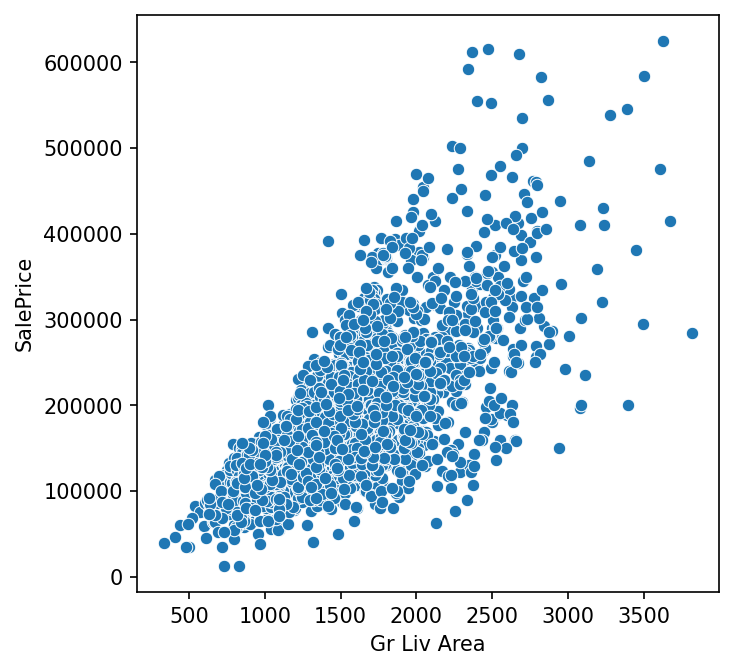

In [19]:
sns.scatterplot(data = df, x = 'Gr Liv Area', y = 'SalePrice')

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

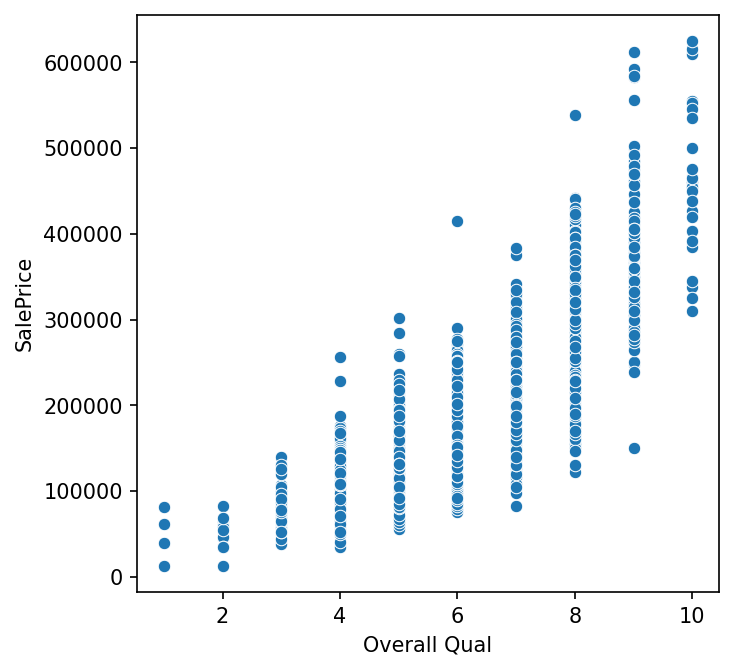

In [20]:
sns.scatterplot(data = df, x = 'Overall Qual', y = 'SalePrice')

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

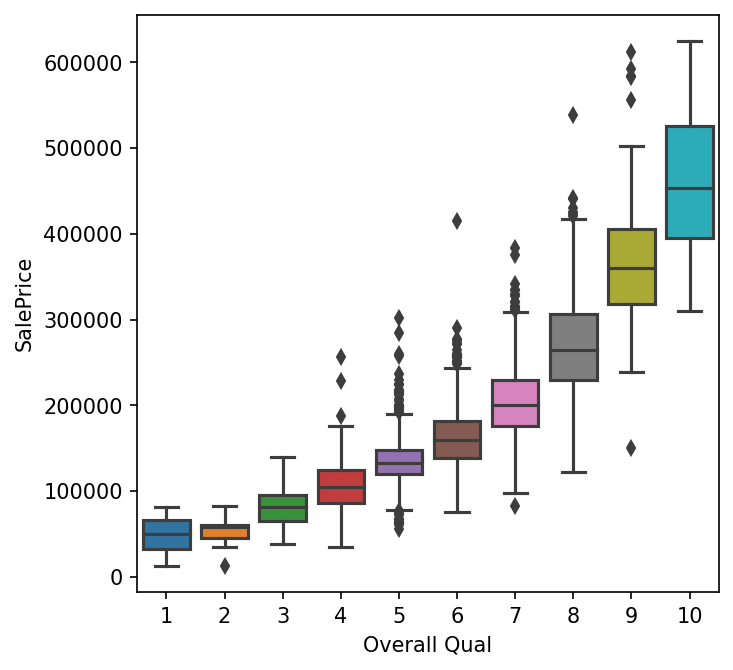

In [22]:
# overall quality wise sales boxplot
sns.boxplot(data = df, y = 'SalePrice', x = 'Overall Qual')

## Handling Missing Values

In [23]:
df.isna().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [25]:
def na_percent(df):
    percent_na = ((df.isna().sum() * 100)/len(df))
    percent_na = percent_na[percent_na>0].sort_values()
    return percent_na

In [26]:
percent_na = na_percent(df)

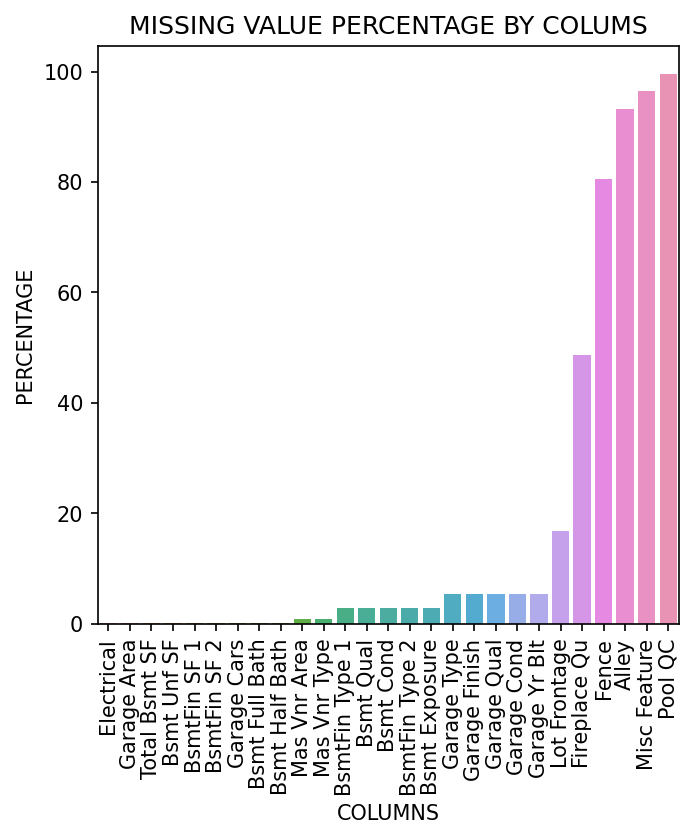

In [27]:
sns.barplot(x = percent_na.index, y = percent_na)
plt.xticks(rotation = 90)
plt.xlabel('COLUMNS')
plt.ylabel('PERCENTAGE')
plt.title('MISSING VALUE PERCENTAGE BY COLUMS')
plt.show()

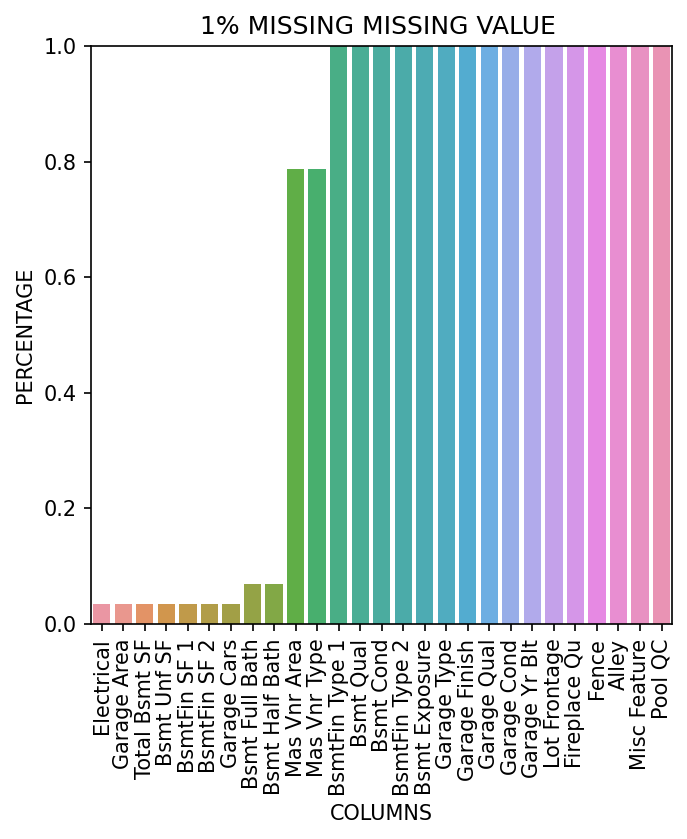

In [32]:
sns.barplot(x = percent_na.index, y = percent_na)
plt.xticks(rotation = 90)
plt.xlabel('COLUMNS')
plt.ylabel('PERCENTAGE')
plt.title('1% MISSING MISSING VALUE ')
plt.ylim(0,1)
plt.show()

In [33]:
percent_na[percent_na < 1]

Electrical        0.034188
Garage Area       0.034188
Total Bsmt SF     0.034188
Bsmt Unf SF       0.034188
BsmtFin SF 1      0.034188
BsmtFin SF 2      0.034188
Garage Cars       0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Area      0.786325
Mas Vnr Type      0.786325
dtype: float64

#### electrical & garage area column
- electirical & garage area - contain very very less (< 0.5%) missing value, so we drop these missing vlaues
#### Basement columns
- in Basement columns 0/none refers that there is no basement in the particular property (so we can replace those values with 0 for numerical data & none for categorical data) (**according to domain knowlwdge all the basement columns are related to each other **)

In [28]:
# checking row where electrical column has ul value
df[df['Electrical'].isna()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,916386080,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [29]:
# checking row where garage area column has ul value
df[df['Garage Area'].isna()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [30]:
# dropping row wherr electrical & garage area are null
df.dropna(axis = 0 , subset = ['Electrical','Garage Area'], inplace=True)

In [34]:
percent_na = na_percent(df)
percent_na[percent_na < 1]

Bsmt Unf SF       0.034211
Total Bsmt SF     0.034211
BsmtFin SF 2      0.034211
BsmtFin SF 1      0.034211
Bsmt Full Bath    0.068423
Bsmt Half Bath    0.068423
Mas Vnr Type      0.786863
Mas Vnr Area      0.786863
dtype: float64

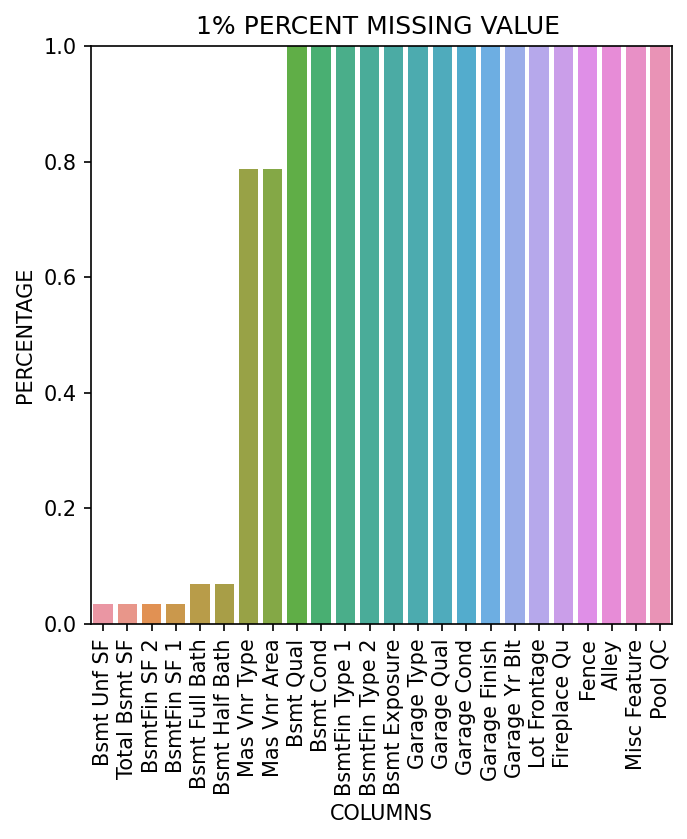

In [35]:
percent_na = na_percent(df)
sns.barplot(x = percent_na.index, y = percent_na)
plt.xticks(rotation = 90)
plt.xlabel('COLUMNS')
plt.ylabel('PERCENTAGE')
plt.title('1% PERCENT MISSING VALUE ')
plt.ylim(0,1)
plt.show()

In [36]:
# replacing nan values to 0 of  numerial basement columns as 0 shows that there is no basement in the property
col = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[col] = df[col].fillna(0)

In [37]:
# replacing na values to 'None' of  numerial basement columns as 0 shows that there is no basement in the property
col =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[col] = df[col].fillna('None')

In [39]:
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna('None')

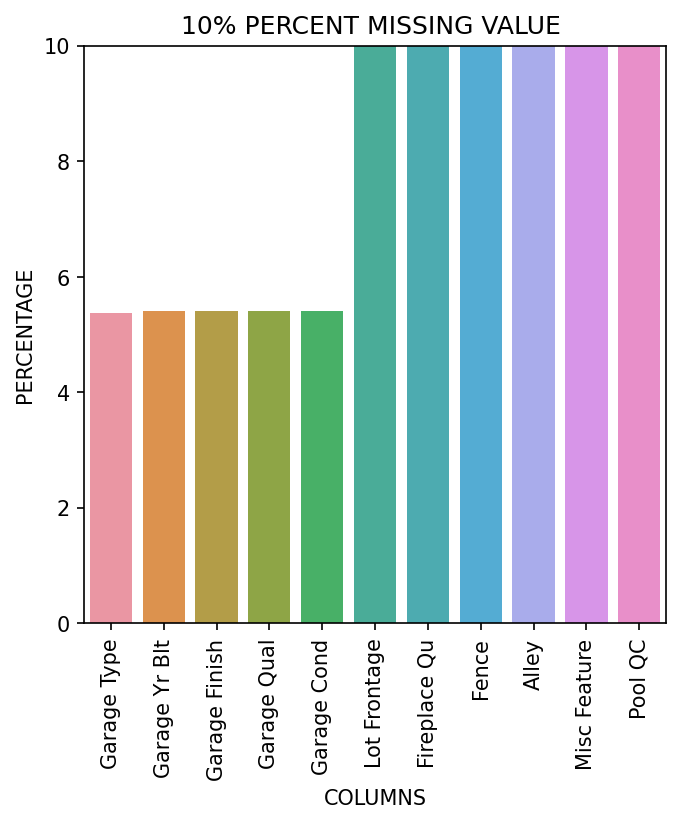

In [40]:
percent_na = na_percent(df)
sns.barplot(x = percent_na.index, y = percent_na)
plt.xticks(rotation = 90)
plt.xlabel('COLUMNS')
plt.ylabel('PERCENTAGE')
plt.title('10% PERCENT MISSING VALUE ')
plt.ylim(0,10,1)
plt.show()

In [47]:
# checking the columns & actual percentage of missing values where the  missing percentage is less than 10%
percent_na = na_percent(df)
percent_na[percent_na < 10]

Garage Type      5.371194
Garage Yr Blt    5.405405
Garage Finish    5.405405
Garage Qual      5.405405
Garage Cond      5.405405
dtype: float64

#### Garage columns
- garage columns are linked with each other
- none or 0 value shows the absence of garage in property
- garage columns have equal number as mising vlaues so we can interpret that these coloumns are related 

In [48]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond','Garage Yr Blt']].isna().sum()

Garage Type      157
Garage Finish    158
Garage Qual      158
Garage Cond      158
Garage Yr Blt    158
dtype: int64

In [51]:
# filling categorical object columns of garage with None & numerical column with 0
# o & none shows absence of garage
col = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[col] = df[col].fillna('None')
df['Garage Yr Blt'].fillna(0,inplace=True)

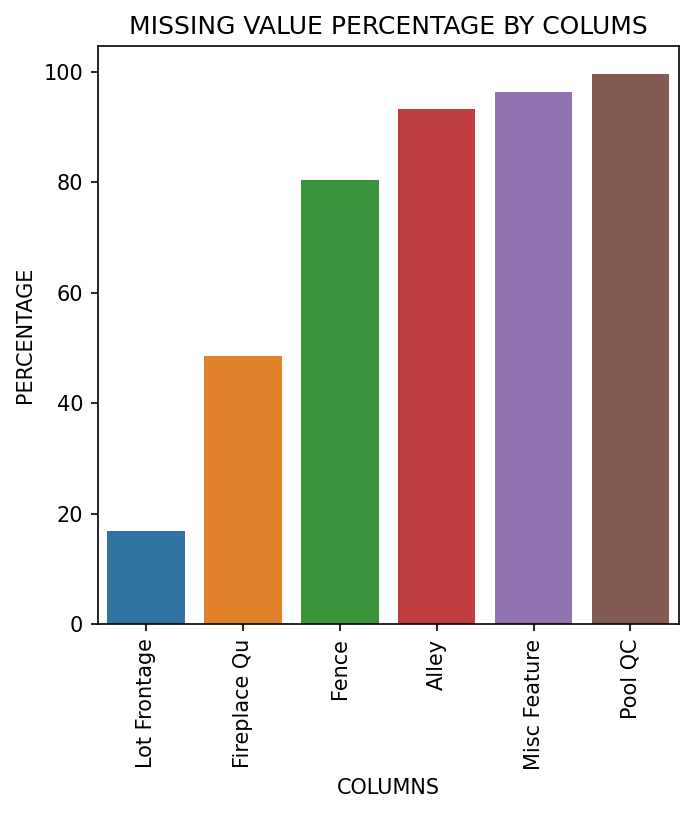

In [52]:
percent_na = na_percent(df)
sns.barplot(x = percent_na.index, y = percent_na)
plt.xticks(rotation = 90)
plt.xlabel('COLUMNS')
plt.ylabel('PERCENTAGE')
plt.title('MISSING VALUE PERCENTAGE BY COLUMS')
plt.show()

### fireplace QU - we keep fill na values with 'None' as none shows absence of fireplace

In [56]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

### [pool QC, Misc Featrure, Alley, Fence] have missing values > 80% so these columns do not provide any information so we  dropp these columns

In [53]:
df.drop(['Pool QC','Misc Feature', 'Alley','Fence'],axis = 1, inplace= True)

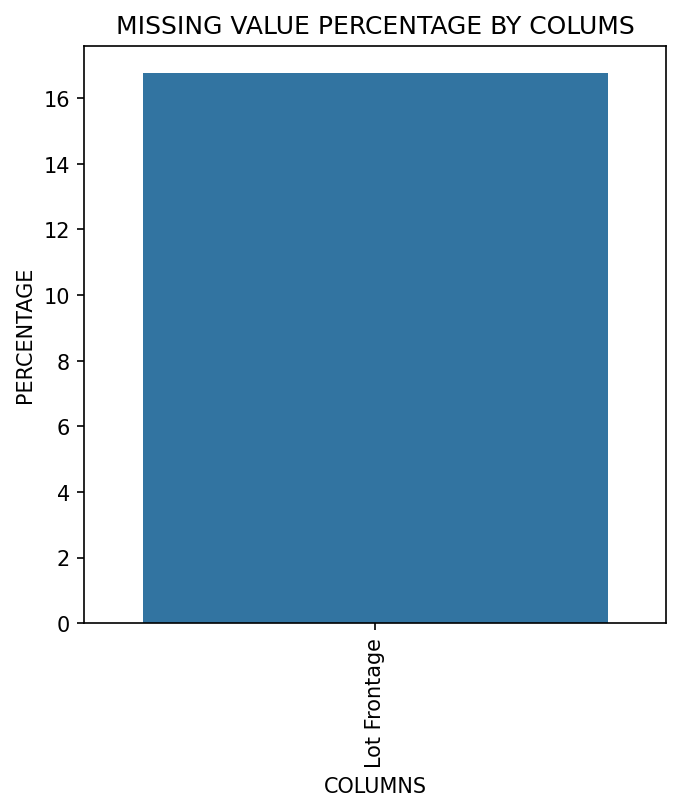

In [57]:
percent_na = na_percent(df)
sns.barplot(x = percent_na.index, y = percent_na)
plt.xticks(rotation = 90)
plt.xlabel('COLUMNS')
plt.ylabel('PERCENTAGE')
plt.title('MISSING VALUE PERCENTAGE BY COLUMS')
plt.show()

In [60]:
df.skew().sort_values()

Garage Yr Blt      -3.925985
Year Built         -0.603049
Year Remod/Add     -0.448523
Garage Cars        -0.219399
PID                 0.058075
Yr Sold             0.132443
Full Bath           0.166288
Overall Qual        0.170431
Mo Sold             0.194791
Garage Area         0.213325
Bedroom AbvGr       0.307176
Total Bsmt SF       0.394887
Overall Cond        0.572600
Bsmt Full Bath      0.615553
Half Bath           0.703478
TotRms AbvGrd       0.704905
Fireplaces          0.731347
BsmtFin SF 1        0.822123
2nd Flr SF          0.849381
Gr Liv Area         0.879197
Bsmt Unf SF         0.924019
1st Flr SF          0.941799
Lot Frontage        1.110539
MS SubClass         1.357129
SalePrice           1.590131
Wood Deck SF        1.848666
Open Porch SF       2.494385
Mas Vnr Area        2.576668
Screen Porch        3.951905
Bsmt Half Bath      3.965970
Enclosed Porch      4.021284
BsmtFin SF 2        4.135084
Kitchen AbvGr       4.307872
3Ssn Porch         11.389876
Low Qual Fin S

In [61]:
df['Overall Qual'].skew()

0.17043065402595445

In [62]:
df['Gr Liv Area'].skew()

0.8791973091862594

In [63]:
df['SalePrice'].skew()

1.5901314266619262

<Axes: xlabel='Misc Val', ylabel='Density'>

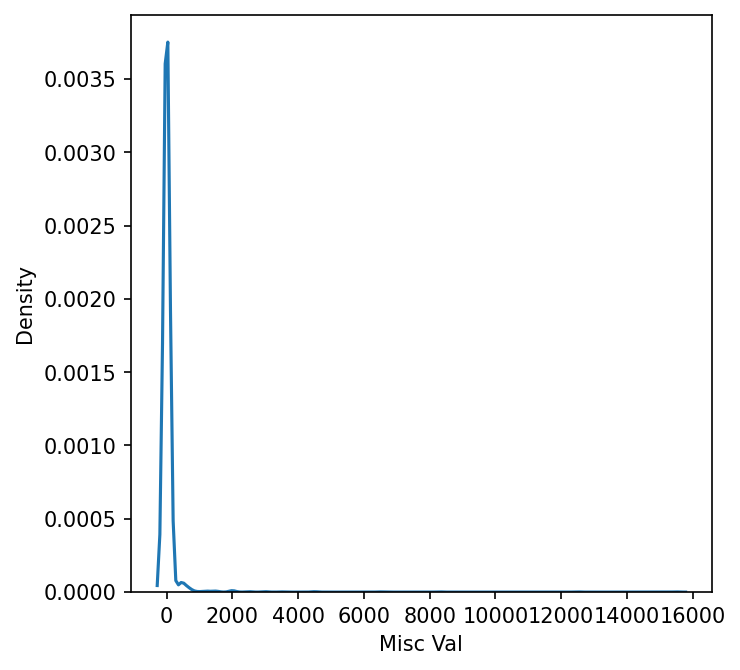

In [64]:
sns.kdeplot(data = df, x = df['Misc Val'])